# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [222]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [224]:
#Type your code here

# Path dataset
path = "/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv"

# Baca file CSV dari URL
data = pd.read_csv(path,sep="\t")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [225]:
#Type your code here

# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases 

In [226]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [227]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


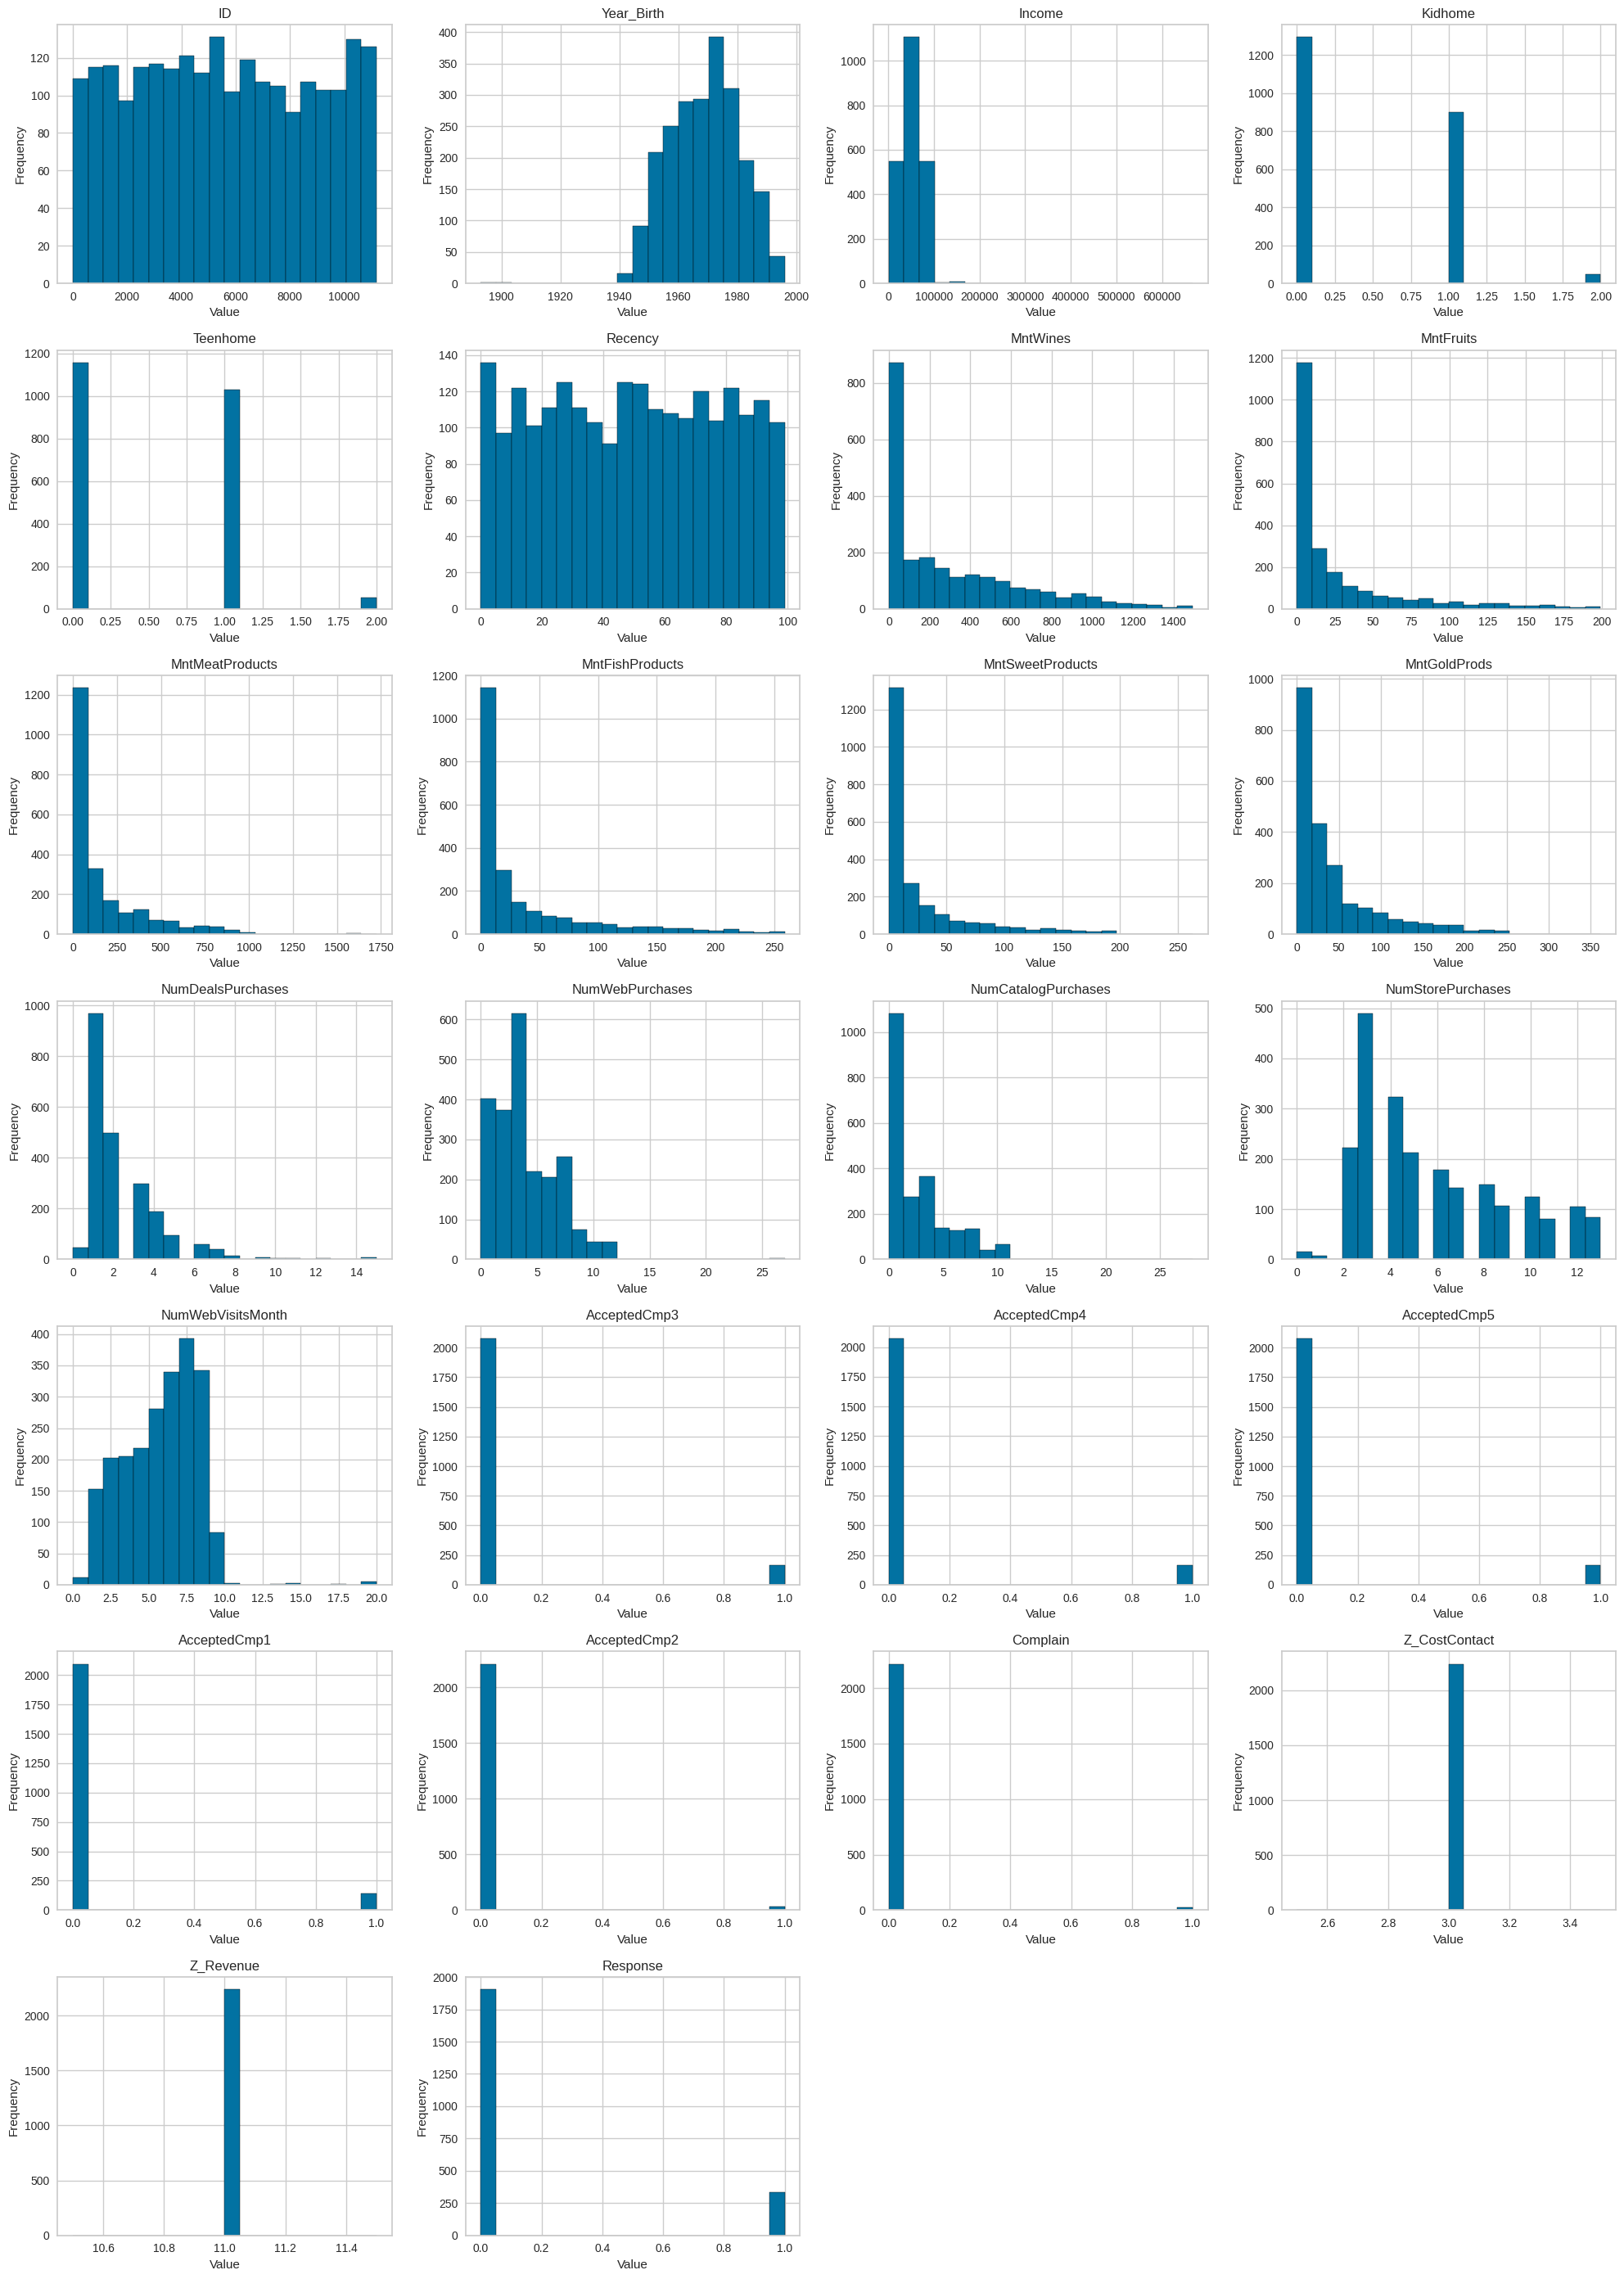

In [228]:
# Memilih dataset dengan kolom numerik
data_numerik = data.select_dtypes(include=['int64', 'float64']).copy()

# Menghitung jumlah variabel
num_vars = data_numerik.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(data_numerik.columns):
    data_numerik[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


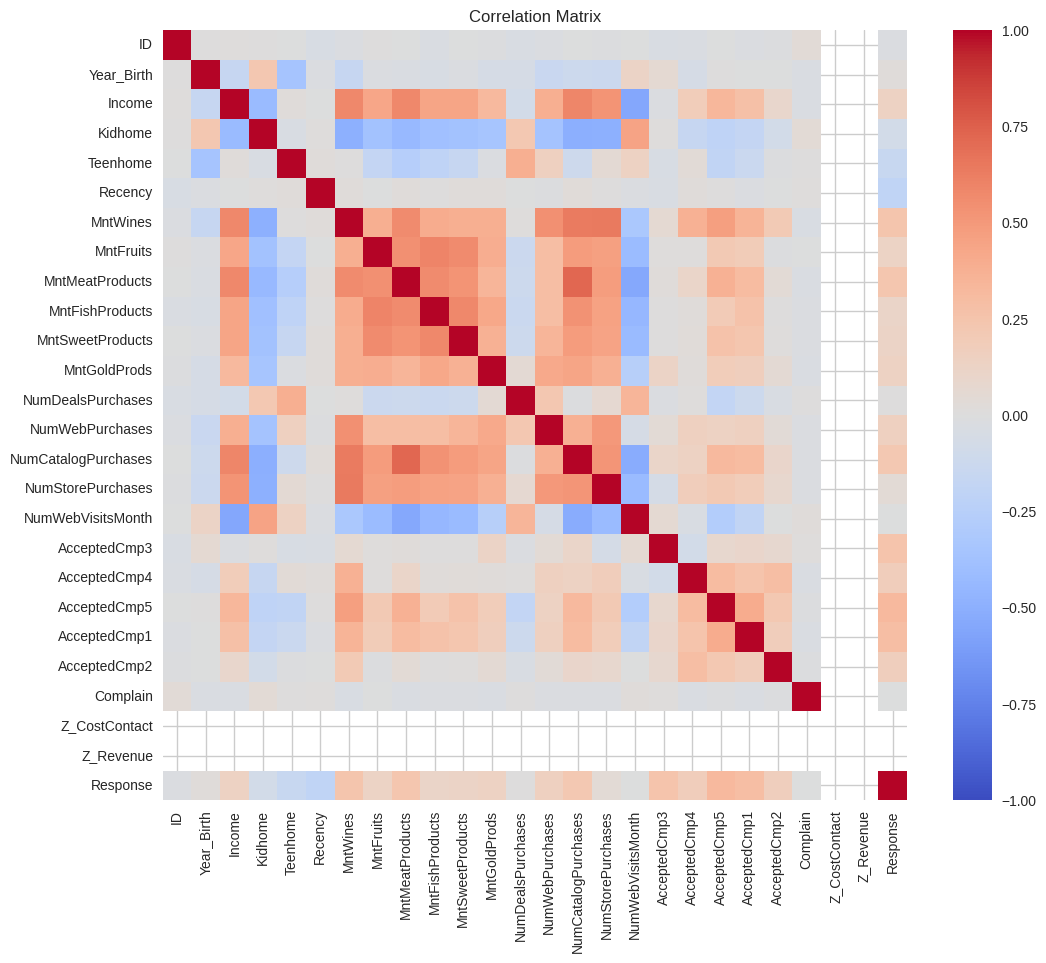

In [229]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = data_numerik.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Disini saya akan melakukan pemisahan kolom yang akan saya lakukan clustering. Adapun kolomnya yaitu income dengan salah satu kolom products, yaitu MntMeatProducts

In [196]:
data_selection = data[["ID","Marital_Status","Income","MntMeatProducts"]].copy()
data_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2240 non-null   int64  
 1   Marital_Status   2240 non-null   object 
 2   Income           2216 non-null   float64
 3   MntMeatProducts  2240 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 70.1+ KB


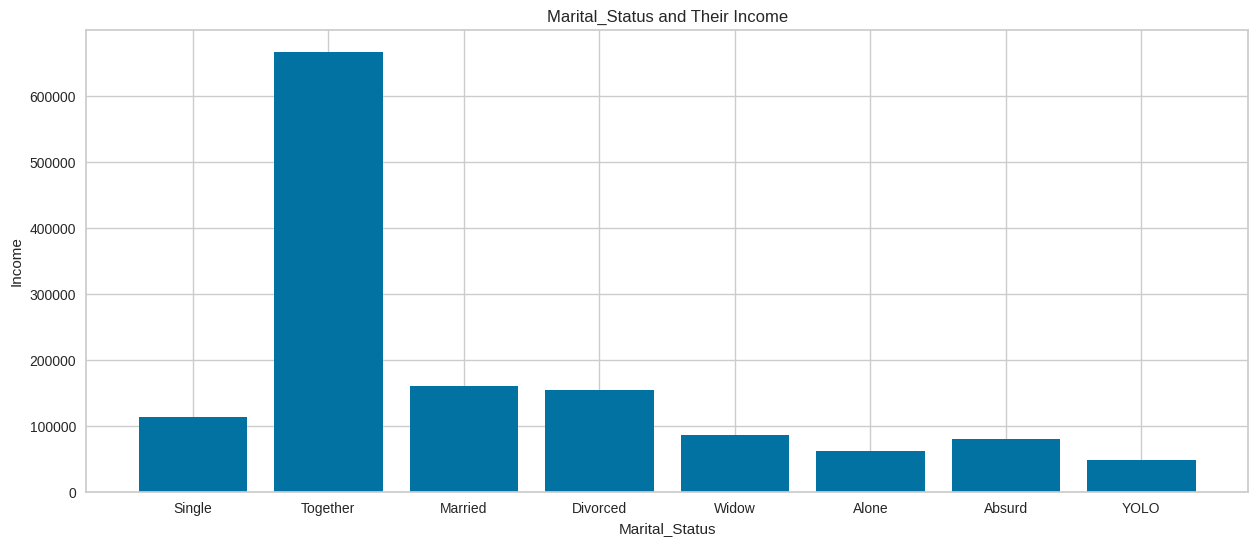

In [199]:
plt.figure(figsize=(15, 6))
plt.bar(data_selection['Marital_Status'],data_selection['Income'])
plt.title("Marital_Status and Their Income")
plt.xlabel("Marital_Status")
plt.ylabel("Income")
plt.show()

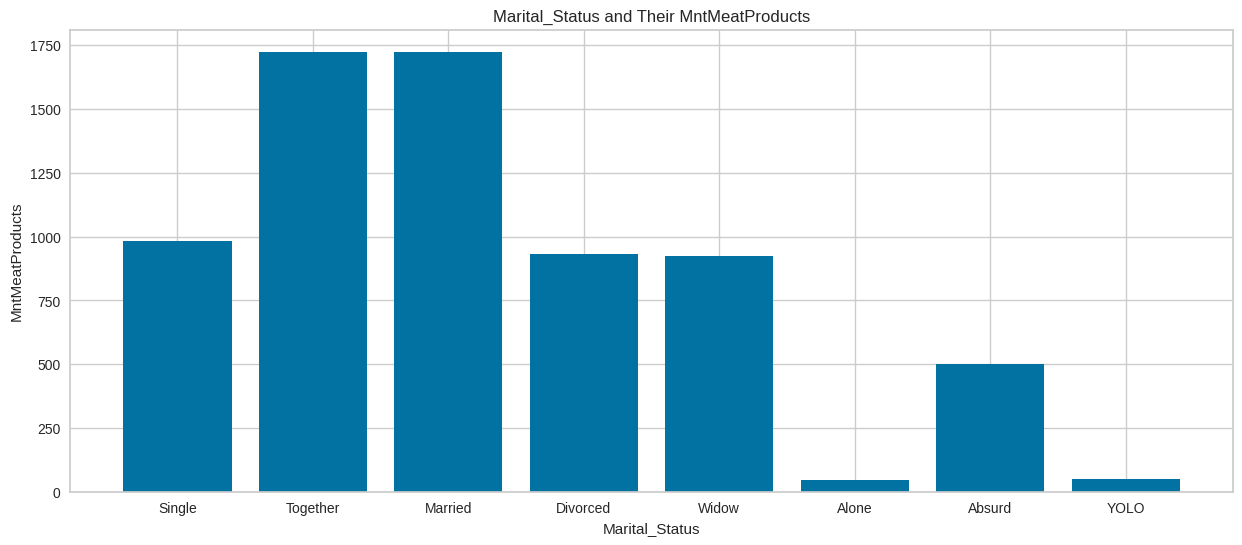

In [200]:
plt.figure(figsize=(15, 6))
plt.bar(data_selection['Marital_Status'],data_selection['MntMeatProducts'])
plt.title("Marital_Status and Their MntMeatProducts")
plt.xlabel("Marital_Status")
plt.ylabel("MntMeatProducts")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [201]:
data_selection['Income'] = data_selection['Income'].fillna(data_selection['Income'].mean())
print("\nMissing values per fitur setelah diperbaiki:")
print(data_selection.isnull().sum())


Missing values per fitur setelah diperbaiki:
ID                 0
Marital_Status     0
Income             0
MntMeatProducts    0
dtype: int64


In [202]:
# Mengidentifikasi baris duplikat
duplicates = data_selection.duplicated()

print("Baris duplikat:")
print(data_selection[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [ID, Marital_Status, Income, MntMeatProducts]
Index: []


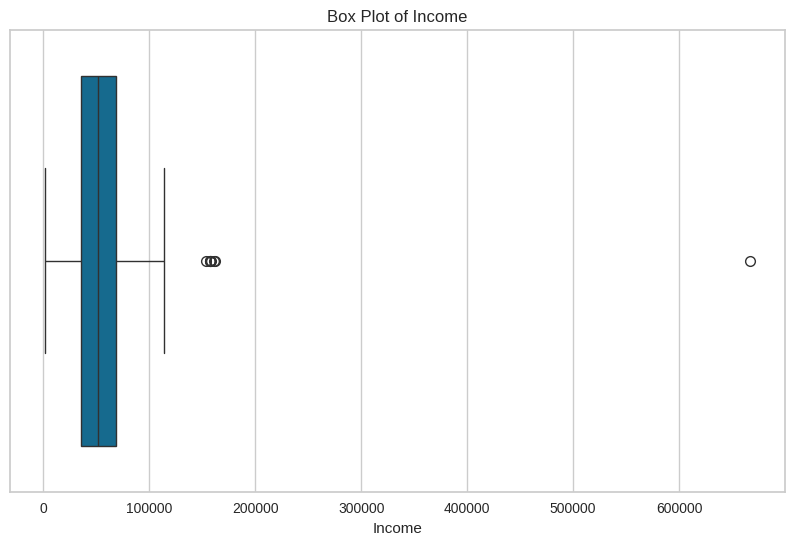

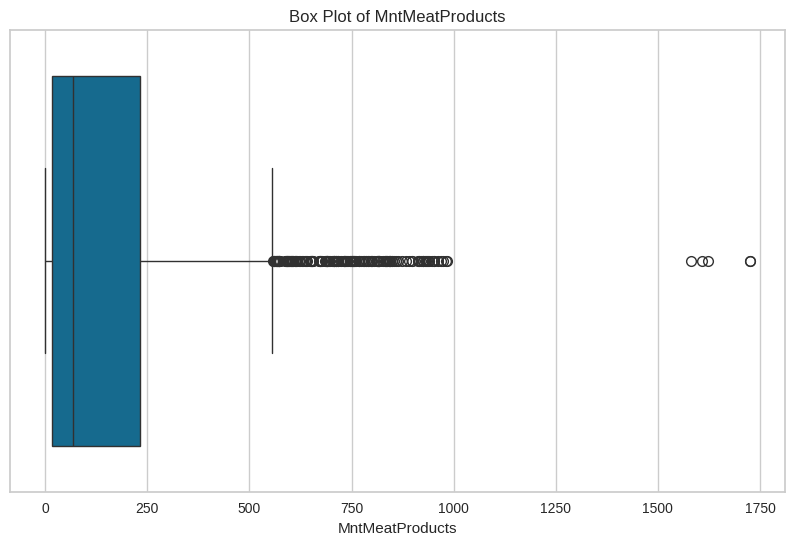

In [203]:
for feature in data_numerik.drop(columns=["ID"]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_numerik[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

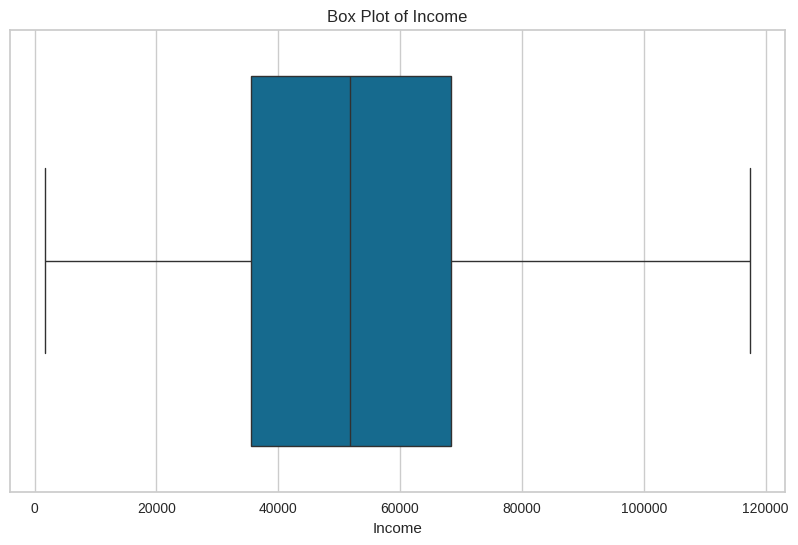

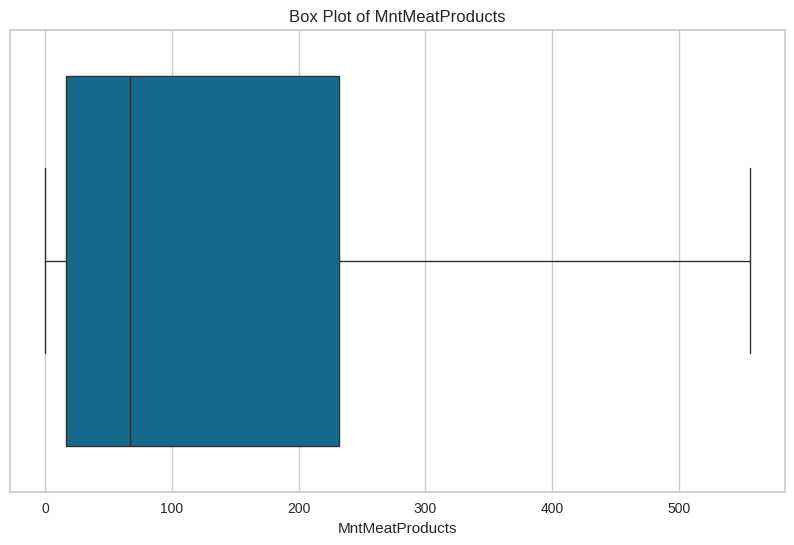

In [204]:
# Calculate IQR for each numerical feature
for feature in data_numerik.drop(columns=["ID"]).columns:
    Q1 = data_selection[feature].quantile(0.25)
    Q3 = data_selection[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply the lambda function to cap outliers
    data_selection[feature] = data_selection[feature].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Plotting boxplot for each feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_selection[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [205]:
# Contoh data
data_cluster = data_selection[["Income", "MntMeatProducts"]].copy()

data_scaled = data_cluster.values
data_scaled

array([[5.8138e+04, 5.4600e+02],
       [4.6344e+04, 6.0000e+00],
       [7.1613e+04, 1.2700e+02],
       ...,
       [5.6981e+04, 2.1700e+02],
       [6.9245e+04, 2.1400e+02],
       [5.2869e+04, 6.1000e+01]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [207]:
# KMeans Clustering

# Mendapatkan jumlah cluster
k = 3
kmeans = KMeans(
    n_clusters=k,
    init='k-means++',
    max_iter=500,
    random_state=42
    )

kmeans.fit(data_scaled)

# Mendapatkan label cluster
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

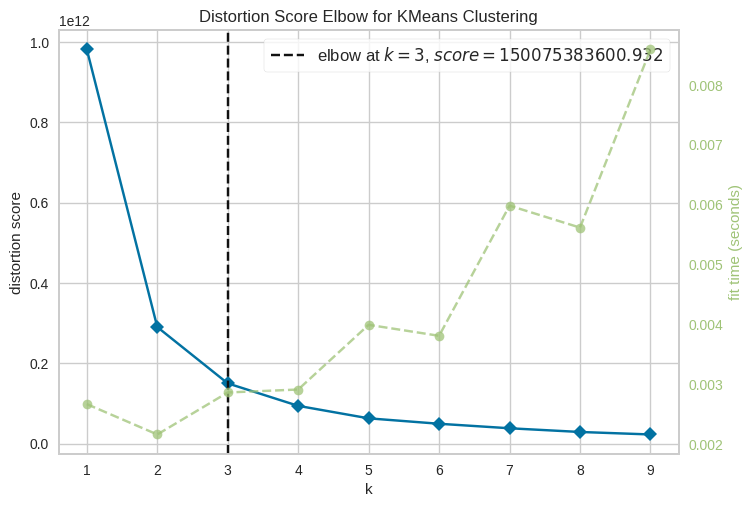

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
#Type your code here

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_scaled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()


In [208]:
# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.55


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [209]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

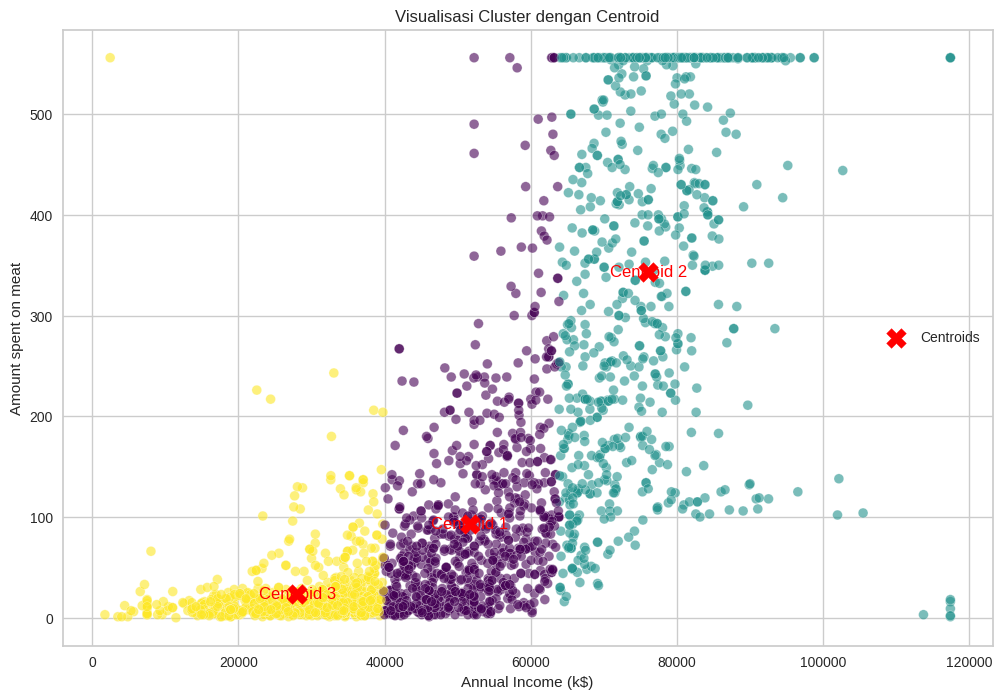

Nilai Centroids:
Centroid 1: Annual Income = 51649.61, Amount Spent on Meat = 93.05
Centroid 2: Annual Income = 76075.86, Amount Spent on Meat = 342.96
Centroid 3: Annual Income = 28057.27, Amount Spent on Meat = 23.67


In [210]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Amount spent on meat')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Amount Spent on Meat = {centroid[1]:.2f}")

In [211]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [212]:
#Type your code here

# Fungsi untuk analisis karakteristik cluster dengan reverse normalization
def analyze_clusters(X_scaled, labels, k):#, scaler):
    print("Analisis Karakteristik Setiap Cluster")

    # Reverse normalization to get original scale values
    # X_original = scaler.inverse_transform(X_scaled)

    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_scaled[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Income (on original scale)
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata MntMeatProducts (on original scale)

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Income ($): {mean_income:.2f}")
        print(f"Rata-rata Amount spent on meat: {mean_spending:.2f}")

# Analisis karakteristik setiap cluster dengan reverse normalization
analyze_clusters(data_scaled, labels, k)#, min_max_scaler)

Analisis Karakteristik Setiap Cluster

Cluster 1:
Rata-rata Income ($): 51770.36
Rata-rata Amount spent on meat: 93.92

Cluster 2:
Rata-rata Income ($): 76178.89
Rata-rata Amount spent on meat: 344.28

Cluster 3:
Rata-rata Income ($): 28089.61
Rata-rata Amount spent on meat: 23.67


Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Rata-rata Income ($): 51,770.36

- Rata-rata Amount spent on meat: 93.92

- Analisis: Cluster ini terdiri dari individu-individu dengan pendapatan tahunan rata-rata sebesar $51,770.36 (sekitar 51 ribu dolar AS). Dalam hal pengeluaran untuk produk daging, rata-rata individu dalam cluster ini menghabiskan sekitar 93.92. Ini menunjukkan bahwa orang-orang dalam cluster ini cenderung memiliki pengeluaran yang cukup tinggi untuk produk daging, meskipun pendapatan mereka berada pada level menengah. Cluster ini mungkin mencakup individu yang cukup mapan dalam hal keuangan dan cenderung menghabiskan lebih banyak uang untuk konsumsi daging, mungkin karena gaya hidup yang lebih konsumtif atau lebih memperhatikan pola makan.

2. Cluster 2:

- Rata-rata Income ($): 76,178.89

- Rata-rata Amount spent on meat: 344.28

- Analisis: Cluster kedua ini terdiri dari individu dengan pendapatan rata-rata yang lebih tinggi, yaitu $76,178.89 (sekitar 76 ribu dolar AS). Dalam hal pengeluaran untuk produk daging, rata-rata pengeluaran mereka adalah 344.28, yang sangat tinggi dibandingkan dengan cluster lainnya. Hal ini menunjukkan bahwa individu dalam cluster ini tidak hanya memiliki pendapatan yang jauh lebih tinggi, tetapi juga cenderung mengalokasikan sejumlah besar uang untuk produk daging. Ini mungkin mencerminkan gaya hidup yang lebih mewah atau kecenderungan untuk memilih produk daging berkualitas tinggi. Cluster ini bisa mencakup individu dengan daya beli yang kuat, seperti eksekutif atau pengusaha yang mampu membeli produk premium.

3. Cluster 3:

- Rata-rata Income ($): 28,089.61

- Rata-rata Amount spent on meat: 23.67

- Analisis: Cluster ketiga ini mencakup individu dengan pendapatan rata-rata yang lebih rendah, yakni $28,089.61 (sekitar 28 ribu dolar AS). Pengeluaran mereka untuk produk daging relatif rendah, yaitu hanya 23.67. Hal ini menunjukkan bahwa individu dalam cluster ini memiliki pendapatan yang lebih terbatas dan mungkin lebih selektif dalam pengeluaran mereka untuk produk daging. Mereka mungkin menghabiskan lebih sedikit uang untuk konsumsi daging karena keterbatasan anggaran atau lebih memilih alternatif lain yang lebih murah. Cluster ini kemungkinan besar terdiri dari individu dengan penghasilan lebih rendah, seperti pekerja dengan gaji standar atau mahasiswa.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [220]:
data_cluster['cluster'] = labels + 1
# Menyimpan hasil clustering ke dalam file CSV
data_cluster.to_csv('/content/drive/MyDrive/Colab Notebooks/clustered_data.csv', index=False)

In [221]:
# Menampilkan beberapa baris pertama dari hasil
data_cluster.head()

,Income,MntMeatProducts,cluster
0,58138.0,546.0,1
1,46344.0,6.0,1
2,71613.0,127.0,2
3,26646.0,20.0,3
4,58293.0,118.0,1
